In [32]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib
# Set default font
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['font.family'] ='sans-serif'

In [18]:
data_file = Path(r"C:\Users\33937\Dropbox\Code\Data-science\2023_car.csv")

In [23]:
data_df = pd.read_csv(data_file, sep=",", parse_dates=True)

In [24]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50883 entries, 0 to 6
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   序号        50883 non-null  object 
 1   主申请人申请编码  50883 non-null  int64  
 2   主申请人姓名    50883 non-null  object 
 3   主申请人证件号码  50880 non-null  object 
 4   家庭代际数     50877 non-null  float64
 5   家庭总积分     50877 non-null  float64
 6   成员最早注册时间  50877 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.1+ MB


In [25]:
data_df.describe()

,主申请人申请编码,家庭代际数,家庭总积分
count,5.088300e+04,50877.000000,50877.000000
mean,4.961855e+12,2.458577,88.091082
std,2.893797e+12,0.501353,29.144189
min,2.000000e+00,1.000000,60.000000
25%,2.443100e+12,2.000000,66.000000
50%,4.970102e+12,2.000000,78.000000
75%,7.476105e+12,3.000000,100.000000
max,9.999105e+12,3.000000,258.000000


In [39]:
data_df["家庭代际数"].value_counts(normalize=True)

2.0    0.538357
3.0    0.460110
1.0    0.001533
Name: 家庭代际数, dtype: float64

In [40]:
data_df["家庭代际数"].value_counts()

2.0    27390
3.0    23409
1.0       78
Name: 家庭代际数, dtype: int64

In [41]:
couple_df =data_df[data_df["家庭代际数"]==1]

<AxesSubplot:xlabel='成员最早注册时间', ylabel='Count'>

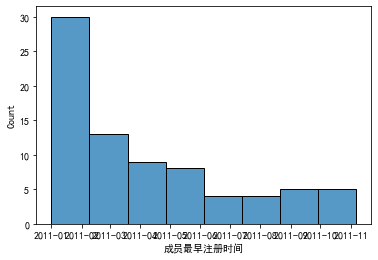

In [42]:
sns.histplot(data= couple_df, x="成员最早注册时间")

In [27]:
data_df["成员最早注册时间"] = pd.to_datetime(data_df["成员最早注册时间"])

<AxesSubplot:xlabel='家庭代际数', ylabel='Count'>

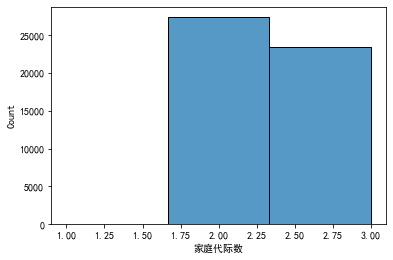

In [37]:
sns.histplot(data= data_df, x="家庭代际数", bins=3)

<AxesSubplot:xlabel='家庭总积分', ylabel='Count'>

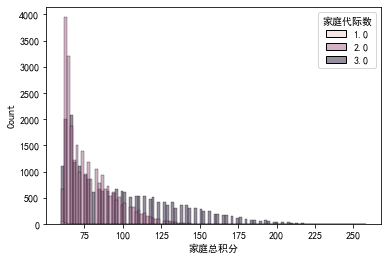

In [38]:
sns.histplot(data= data_df, x="家庭总积分", hue="家庭代际数")